<a href="https://colab.research.google.com/github/tiffhugh/DATA71200/blob/main/Project3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1: Import data

In [1]:
pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo
import pandas as pd

# fetch dataset
drug_consumption_quantified = fetch_ucirepo(id=373)

# data (as pandas dataframes)
X = drug_consumption_quantified.data.features
y = drug_consumption_quantified.data.targets
drug_consumption_df = pd.concat([X, y], axis=1)

recode/redefine variables

In [3]:
from ucimlrepo import fetch_ucirepo
import pandas as pd

# fetch dataset
drug_consumption_quantified = fetch_ucirepo(id=373)

# data (as pandas dataframes)
X = drug_consumption_quantified.data.features
y = drug_consumption_quantified.data.targets
drug_consumption_df = pd.concat([X, y], axis=1)

# Create binary classification for drug consumption(1- consumes drugs, 0- doesnt consumes drugs)
# 1- (Used last, Month, Week, Day), 0-(Never Used, Used..over a Decade,Last Decade, Year)
def change(x):
    if ((x == 'CL6') or (x == 'CL5') or (x == 'CL4')):
        return 1
    elif ((x == 'CL0') or (x == 'CL1') or (x == 'CL2') or (x == 'CL3')):
        return 0
    return x

columns_to_map = ['alcohol', 'amphet', 'amyl', 'benzos', 'caff', 'cannabis', 'choc', 'coke', 'crack', 'ecstasy', 'heroin', 'ketamine', 'legalh', 'lsd', 'meth', 'mushrooms', 'nicotine', 'semer', 'vsa']
# Apply the change function to specified columns
for column in columns_to_map:
    drug_consumption_df[column] = drug_consumption_df[column].apply(lambda x: change(x)).astype(int)

# Stimulants - caffeine, nicotine, amphet, coke, crack, meth
drug_consumption_df['stimulants'] = drug_consumption_df.apply(lambda x: int((x['caff']  + x['nicotine'] + x['coke'] + x['crack'] + x['meth'] )>0), axis=1)
# Depressants - alcohol, benzos, heroin
drug_consumption_df['depressants'] = drug_consumption_df.apply(lambda x: int((x['alcohol']  + x['benzos'] + x['heroin'] )>0), axis=1)
# Hallucinogens - Lsd, mushrooms, ketamine, ecstasy, cannabis
drug_consumption_df['hallucinogens'] = drug_consumption_df.apply(lambda x: int((x['lsd']  + x['mushrooms'] + x['ketamine'] + x['ecstasy'] + x['cannabis'] )>0), axis=1)

def combine_categories(row):
    categories = []
    if row['stimulants'] == 1:
        categories.append('stimulant')
    if row['depressants'] == 1:
        categories.append('depressant')
    if row['hallucinogens'] == 1:
        categories.append('hallucinogen')

    return '+'.join(categories) if categories else 'none'

drug_consumption_df['drug_category'] = drug_consumption_df.apply(combine_categories, axis=1)

# Drop the individual drug category columns and other original columns
drug_consumption_df.drop(['alcohol', 'amphet', 'amyl', 'benzos', 'caff', 'cannabis', 'choc', 'coke', 'crack', 'ecstasy', 'heroin', 'ketamine', 'legalh', 'lsd', 'meth', 'mushrooms', 'nicotine', 'semer', 'vsa', 'stimulants', 'depressants', 'hallucinogens'], axis=1, inplace=True)

print(drug_consumption_df)

          age   gender  education  country  ethnicity   nscore   escore  \
0     0.49788  0.48246   -0.05921  0.96082    0.12600  0.31287 -0.57545   
1    -0.07854 -0.48246    1.98437  0.96082   -0.31685 -0.67825  1.93886   
2     0.49788 -0.48246   -0.05921  0.96082   -0.31685 -0.46725  0.80523   
3    -0.95197  0.48246    1.16365  0.96082   -0.31685 -0.14882 -0.80615   
4     0.49788  0.48246    1.98437  0.96082   -0.31685  0.73545 -1.63340   
...       ...      ...        ...      ...        ...      ...      ...   
1880 -0.95197  0.48246   -0.61113 -0.57009   -0.31685 -1.19430  1.74091   
1881 -0.95197 -0.48246   -0.61113 -0.57009   -0.31685 -0.24649  1.74091   
1882 -0.07854  0.48246    0.45468 -0.57009   -0.31685  1.13281 -1.37639   
1883 -0.95197  0.48246   -0.61113 -0.57009   -0.31685  0.91093 -1.92173   
1884 -0.95197 -0.48246   -0.61113  0.21128   -0.31685 -0.46725  2.12700   

       oscore   ascore   cscore  impuslive       ss  \
0    -0.58331 -0.91699 -0.00665   -0.21712 -

In [4]:
# Recode gender (1- Female, 0-Male)
def change(x):
    if (x == 0.48246):
        x = 1
    elif (x == -0.48246):
        x = 0
    return x
drug_consumption_df['gender'] = drug_consumption_df['gender'].apply(lambda x: change(x))
# Recode Education
def changeEducation(x):
  if (x == -2.43591):
    x = 0
  elif (x == -1.73790):
    x = 1
  elif (x == -1.43719):
    x = 2
  elif (x == -1.22751):
    x = 3
  elif (x == -0.61113):
    x = 4
  elif (x == -0.05921):
    x = 5
  elif (x == 0.45468):
    x = 6
  elif (x == 1.16365):
    x = 7
  elif (x == 1.98437):
    x = 8
  return x
drug_consumption_df['education'] = drug_consumption_df['education'].apply(lambda x: changeEducation(x))
#Recode Age
def changeAge(x):
    if (x == -0.95197):
        x = 0
    elif (x == -0.07854):
        x = 1
    elif (x == 0.49788):
        x = 2
    elif (x == 1.09449):
        x = 3
    elif (x == 1.82213):
        x = 4
    elif (x == 2.59171):
        x = 5
    return x
drug_consumption_df['age'] = drug_consumption_df['age'].apply(lambda x: changeAge(x))

In [5]:
# Update target variables
feature_columns = ['age', 'gender', 'education', 'nscore', 'oscore', 'ascore', 'impuslive', 'ss']
target_column = ['drug_category']
X = drug_consumption_df[feature_columns]
y = drug_consumption_df[target_column]

Step 1: Train Yest Split

In [6]:
#Divide into a training set and a testing set
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)

for train_index, test_index in sss.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

# Check the distribution in the splits
print("Train target distribution:\n", y_train.value_counts(normalize=True))
print("Test target distribution:\n", y_test.value_counts(normalize=True))

Train target distribution:
 drug_category                    
stimulant+depressant                 0.434350
stimulant+depressant+hallucinogen    0.387931
stimulant                            0.080239
stimulant+hallucinogen               0.053050
depressant                           0.021220
depressant+hallucinogen              0.009284
none                                 0.009284
hallucinogen                         0.004642
Name: proportion, dtype: float64
Test target distribution:
 drug_category                    
stimulant+depressant                 0.435013
stimulant+depressant+hallucinogen    0.387268
stimulant                            0.079576
stimulant+hallucinogen               0.053050
depressant                           0.021220
none                                 0.010610
depressant+hallucinogen              0.007958
hallucinogen                         0.005305
Name: proportion, dtype: float64


Step 2: PCA for feature selection

Number of components to retain 95% variance: 7


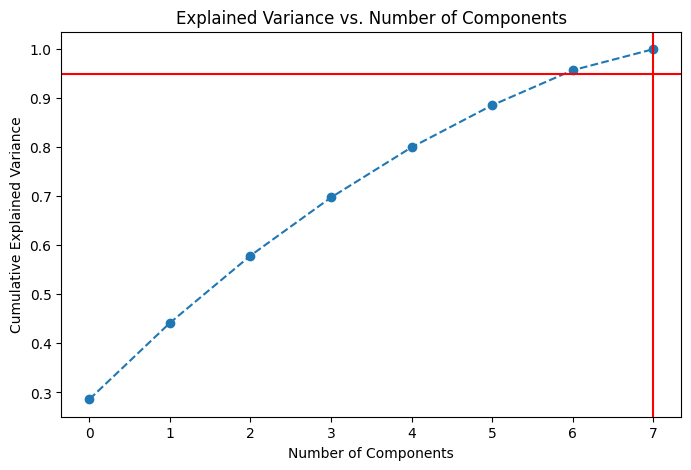

<ipython-input-8-d64420365be1>:46: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_pca, y_train)


Training Accuracy: 0.7625994694960212
Testing Accuracy: 0.6710875331564987
Testing F1 Score: 0.6053690254561701
Classification Report:
                                    precision    recall  f1-score   support

                       depressant       0.00      0.00      0.00         8
          depressant+hallucinogen       0.00      0.00      0.00         3
                     hallucinogen       0.00      0.00      0.00         2
                             none       0.00      0.00      0.00         4
                        stimulant       0.00      0.00      0.00        30
             stimulant+depressant       0.66      0.85      0.74       164
stimulant+depressant+hallucinogen       0.68      0.77      0.73       146
           stimulant+hallucinogen       0.00      0.00      0.00        20

                         accuracy                           0.67       377
                        macro avg       0.17      0.20      0.18       377
                     weighted avg    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, f1_score

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA
pca = PCA()
pca.fit(X_train_scaled)

# Determine the number of components to retain 95% variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
num_components = np.where(cumulative_variance >= 0.95)[0][0] + 1

print(f"Number of components to retain 95% variance: {num_components}")

# Plot the cumulative variance explained
plt.figure(figsize=(8, 5))
plt.plot(cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.axhline(y=0.95, color='r', linestyle='-')
plt.axvline(x=num_components, color='r', linestyle='-')
plt.show()

#  Transform data using PCA with the chosen number of components
pca = PCA(n_components=num_components)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

#  Train your best-performing model from Project 2
best_params = {
    'max_depth': 10,
    'min_samples_leaf': 1,
    'min_samples_split': 10,
    'n_estimators': 50
}
model = RandomForestClassifier(**best_params, random_state=0)
model.fit(X_train_pca, y_train)

# Evaluate the model
y_pred_train = model.predict(X_train_pca)
y_pred_test = model.predict(X_test_pca)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
test_f1_score = f1_score(y_test, y_pred_test, average='weighted')

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)
print("Testing F1 Score:", test_f1_score)
print("Classification Report:\n", classification_report(y_test, y_pred_test))

# Compare the F1 score with the best F1 score from Project 2
best_f1_score_project_2 = 0.408283839976544
improvement = test_f1_score - best_f1_score_project_2

print(f"Improvement in F1 Score: {improvement:.4f}")


Step 3: KMeans without PCA

In [12]:
!pip install mglearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 6.4 MB/s eta 0:00:00


In [50]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=0)  # Adjust n_clusters as needed
kmeans.fit(X_scaled)

# Predict cluster labels
cluster_labels = kmeans.predict(X_scaled)

# Calculate silhouette score to evaluate the clustering
silhouette_avg = silhouette_score(X_scaled, cluster_labels)
print(f"Silhouette Score: {silhouette_avg}")

# Add cluster labels to the dataframe for analysis
drug_consumption_df['cluster'] = cluster_labels


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.14989988167311727


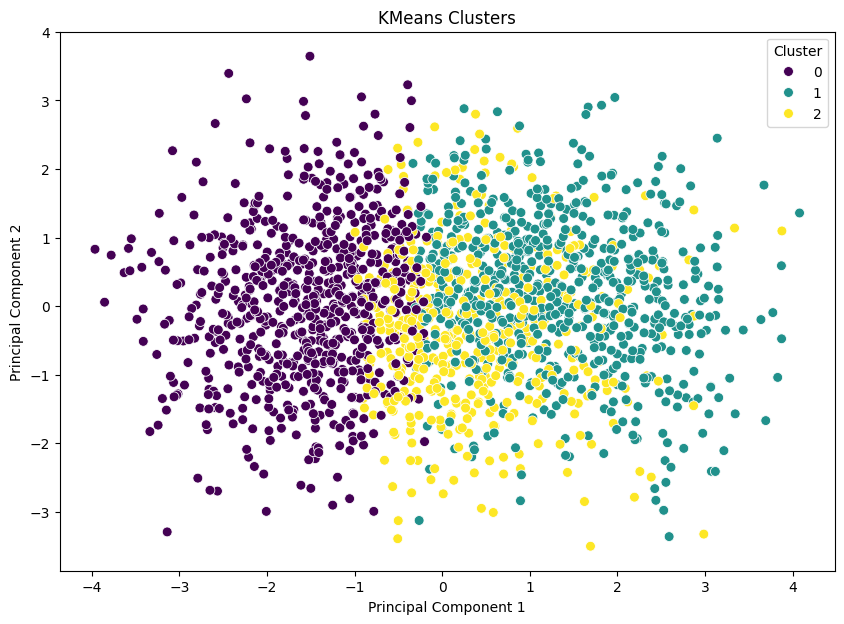

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Reduce dimensions to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Add the PCA components and cluster labels to a new DataFrame
visualization_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
visualization_df['cluster'] = cluster_labels

# Plot the clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=visualization_df, palette='viridis', s=50)
plt.title('KMeans Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()


Elbow + KMeans with PCA

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

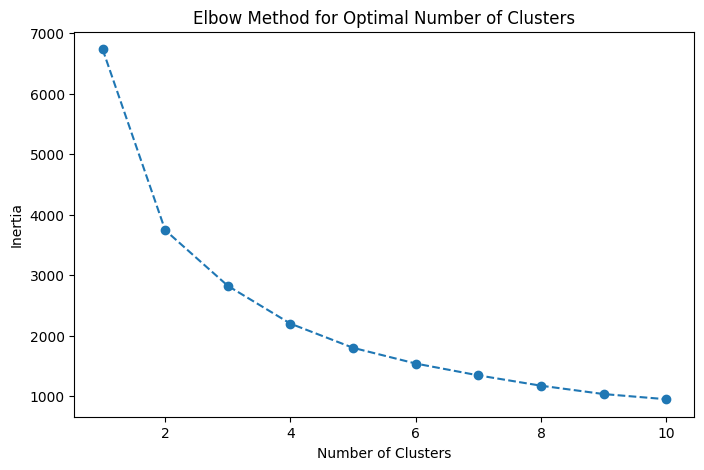

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


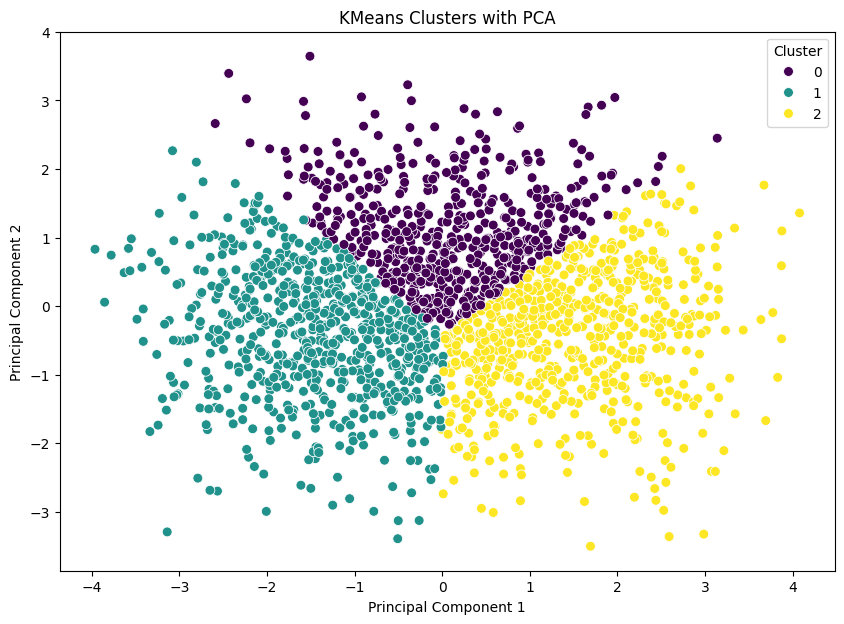

In [55]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)  # Reduce dimensions to 2 for visualization
X_pca = pca.fit_transform(X_scaled)

# Elbow method
num_clusters = range(1, 11)
inertia = []

for k in num_clusters:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(8, 5))
plt.plot(num_clusters, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

# Perform KMeans clustering with the chosen number of clusters
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=0)
cluster_labels = kmeans.fit_predict(X_pca)

# Create a DataFrame for visualization
visualization_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
visualization_df['cluster'] = cluster_labels

# Plot the clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=visualization_df, palette='viridis', s=50)
plt.title('KMeans Clusters with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()


Aggolmerate/Hierarchical without PCA

In [57]:
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform Agglomerative Hierarchical Clustering
agglo_clustering = AgglomerativeClustering(n_clusters=3)
cluster_labels = agglo_clustering.fit_predict(X_scaled)

# Add cluster labels to the dataframe
drug_consumption_df['cluster'] = cluster_labels

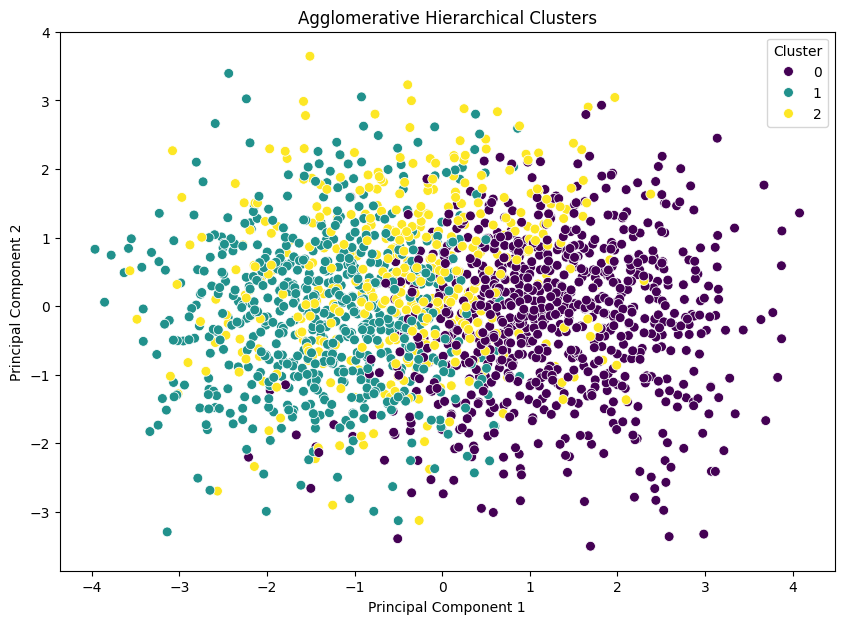

In [59]:
from sklearn.decomposition import PCA
import seaborn as sns
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

#  visualization
visualization_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
visualization_df['cluster'] = cluster_labels

# Plot the clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=visualization_df, palette='viridis', s=50)
plt.title('Agglomerative Hierarchical Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()


Aggolmerate/Hierarchical with PCA

In [61]:
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to reduce dimensions to 2 for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Perform Agglomerative Hierarchical Clustering
agglo_clustering = AgglomerativeClustering(n_clusters=3)
cluster_labels = agglo_clustering.fit_predict(X_pca)

# Add cluster labels to the dataframe
drug_consumption_df['cluster'] = cluster_labels


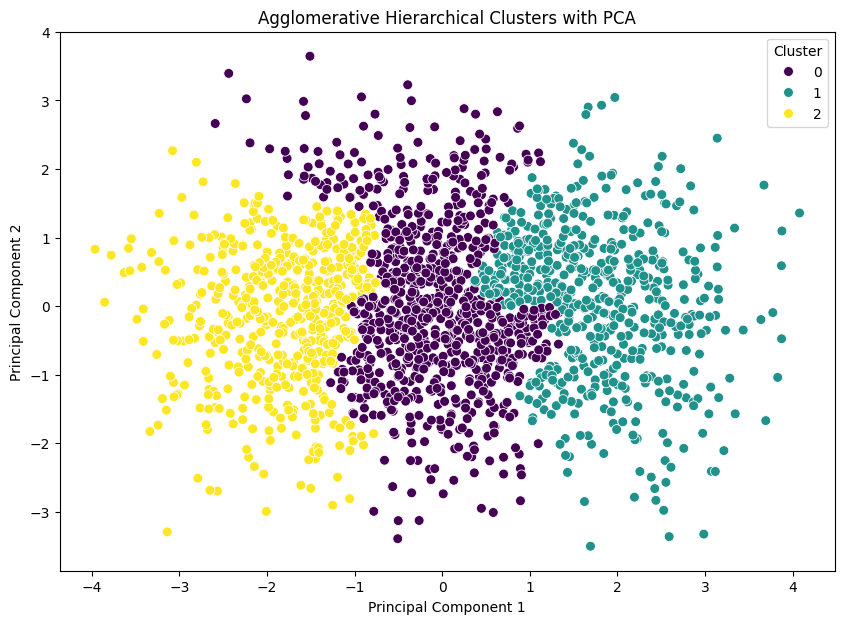

In [62]:
import seaborn as sns

# Create a DataFrame for visualization
visualization_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
visualization_df['cluster'] = cluster_labels

# Plot the clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=visualization_df, palette='viridis', s=50)
plt.title('Agglomerative Hierarchical Clusters with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()


DBSCAN without PCA

In [64]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
cluster_labels = dbscan.fit_predict(X_scaled)

# Add cluster labels to the dataframe
drug_consumption_df['cluster'] = cluster_labels


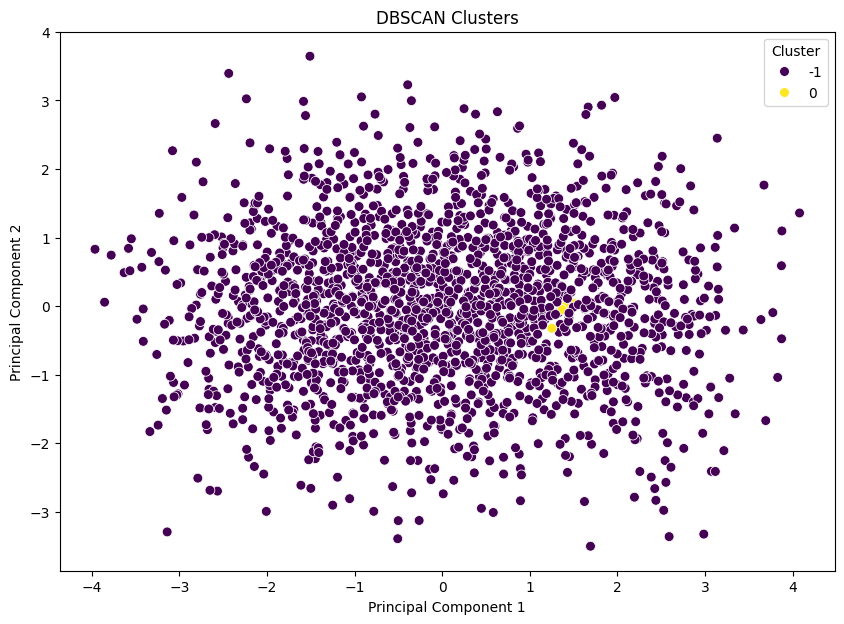

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Reduce dimensions to 2D for visualization using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for visualization
visualization_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
visualization_df['cluster'] = cluster_labels

# Plot the clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=visualization_df, palette='viridis', s=50)
plt.title('DBSCAN Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()


DBSCAN with PCA

In [68]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to reduce dimensions to 2 for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


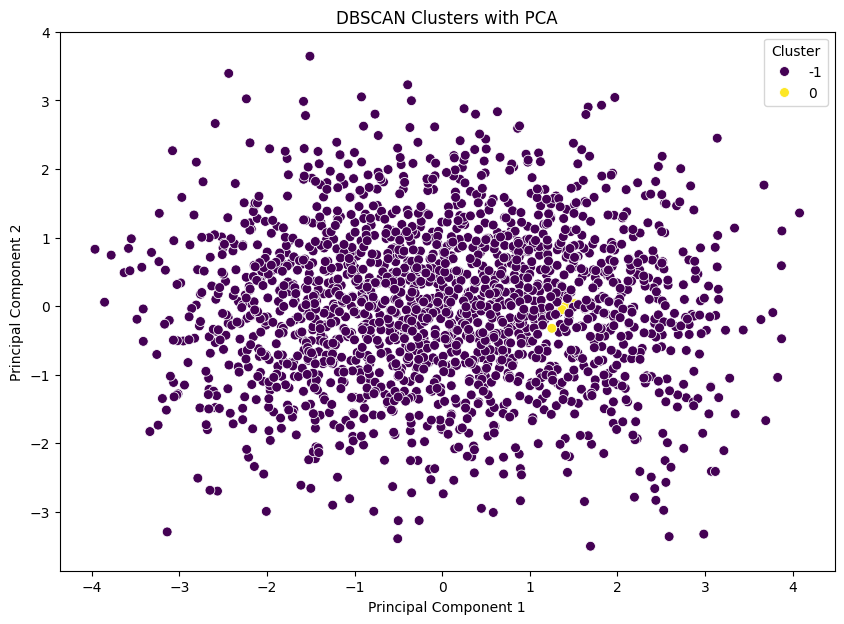

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame for visualization
visualization_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
visualization_df['cluster'] = cluster_labels

# Plot the clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=visualization_df, palette='viridis', s=50)
plt.title('DBSCAN Clusters with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

In [70]:
from sklearn.metrics import adjusted_rand_score, silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA for reduced dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Define clustering models
clustering_models = {
    'KMeans without PCA': KMeans(n_clusters=3, random_state=0),
    'Agglomerative without PCA': AgglomerativeClustering(n_clusters=3),
    'DBSCAN without PCA': DBSCAN(eps=0.5, min_samples=5),
    'KMeans with PCA': KMeans(n_clusters=3, random_state=0),
    'Agglomerative with PCA': AgglomerativeClustering(n_clusters=3),
    'DBSCAN with PCA': DBSCAN(eps=0.5, min_samples=5)
}

# Dictionary to store results
results = {}

# Perform clustering and calculate ARI and Silhouette Coefficient
for name, model in clustering_models.items():
    if 'without PCA' in name:
        labels = model.fit_predict(X_scaled)
        data = X_scaled
    else:
        labels = model.fit_predict(X_pca)
        data = X_pca

    if len(set(labels)) > 1:  # Silhouette score is undefined for a single cluster
        silhouette_avg = silhouette_score(data, labels)
    else:
        silhouette_avg = -1  # Indicate an invalid Silhouette score

    # Using target_column as true labels for ARI
    true_labels = drug_consumption_df['drug_category'].astype('category').cat.codes

    ari = adjusted_rand_score(true_labels, labels)

    results[name] = {
        'ARI': ari,
        'Silhouette Coefficient': silhouette_avg
    }

# Print the results
for name, metrics in results.items():
    print(f"{name}:")
    print(f"  ARI: {metrics['ARI']}")
    print(f"  Silhouette Coefficient: {metrics['Silhouette Coefficient']}\n")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans without PCA:
  ARI: 0.15757452916105824
  Silhouette Coefficient: 0.14989988167311727

Agglomerative without PCA:
  ARI: 0.14285281836536495
  Silhouette Coefficient: 0.12312899985981443

DBSCAN without PCA:
  ARI: -3.688024331725701e-05
  Silhouette Coefficient: -0.1610343682919878

KMeans with PCA:
  ARI: 0.133063633687937
  Silhouette Coefficient: 0.3319551540426571

Agglomerative with PCA:
  ARI: 0.1158806041760774
  Silhouette Coefficient: 0.2576187298487738

DBSCAN with PCA:
  ARI: 0.004372581701798384
  Silhouette Coefficient: 0.4386995767693842

